# Natural Language Processing (NLP) training to identify scam messages from Kaggle's SMS Spam Collection data set

## Initial setup of Python libraries

##### The SVC Algorithm used in analyzing UC Irvine's data set is defined as a function below

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import pickle
import os
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
%matplotlib inline

# Function for preprocessing
def transform_message(message):
    message_not_punc = ''.join([char for char in message if char not in string.punctuation])
    stop_words = set(stopwords.words('english'))
    message_clean = [word.lower() for word in message_not_punc.split() if word.lower() not in stop_words]
    return message_clean

# Full pipeline function for the SVC Algorithm
def spam_detection_pipeline(data, text_column, label_column):
    # Drop rows with missing values in text_column or label_column
    data = data.dropna(subset=[text_column, label_column])

    # Vectorization: CountVectorizer -> TfidfTransformer
    vectorizer = CountVectorizer(analyzer=transform_message)
    X_counts = vectorizer.fit_transform(data[text_column])

    tfidf_transformer = TfidfTransformer()
    X_tfidf = tfidf_transformer.fit_transform(X_counts)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf, 
        data[label_column], 
        test_size=0.3, 
        random_state=50
    )
    
    # Train the SVM model
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    
    # Predictions
    predictions = clf.predict(X_test)
    
    # Evaluation
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

## Using the Support Vector Classification (SVC) algorithm-powered NLP to analyze the Kaggle dataset

In [2]:
# Load a new dataset (ensure it has 'message' and 'label' columns)
new_data = pd.read_csv('Datasets/Kaggle_SPAM_cleaned.csv')
print(new_data['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


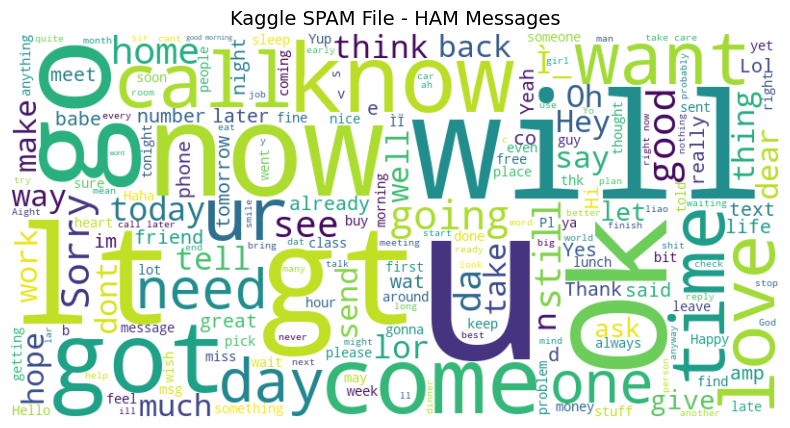

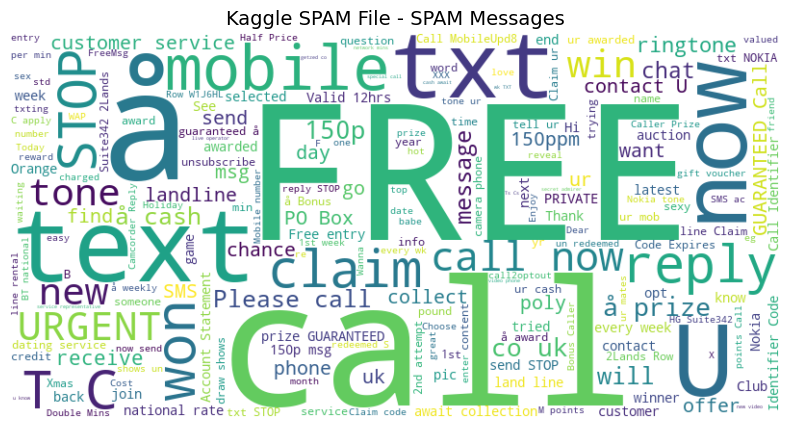

In [3]:
kaggle_ham = ' '.join(new_data[new_data.iloc[:, 0] == 'ham'].iloc[:, 1].dropna())
kaggle_spam = ' '.join(new_data[new_data.iloc[:, 0] == 'spam'].iloc[:, 1].dropna())

generate_wordcloud(kaggle_ham, 'Kaggle SPAM File - HAM Messages')
generate_wordcloud(kaggle_spam, 'Kaggle SPAM File - SPAM Messages')

In [4]:
# Run the pipeline
spam_detection_pipeline(new_data, text_column='message', label_column='label')

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1426
        spam       0.99      0.84      0.91       246

    accuracy                           0.97      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.97      0.97      1672

Confusion Matrix:
 [[1424    2]
 [  40  206]]


## Saving the model data

In [ ]:
model_dir = 'Datasets/Kaggle_SPAM_Model'
# Train CountVectorizer
vectorizer = CountVectorizer(analyzer=transform_message)
X_counts = vectorizer.fit_transform(new_data['message'])  # Fitting the vectorizer

# Train TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)  # Fitting the TF-IDF transformer

# Train the SVM model
clf = SVC(kernel='linear', class_weight='balanced')
clf.fit(X_tfidf, new_data['label'])

with open(os.path.join(model_dir, 'vectorizer_dataset2.pkl'), 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

with open(os.path.join(model_dir, 'tfidf_transformer_dataset2.pkl'), 'wb') as tfidf_file:
    pickle.dump(tfidf_transformer, tfidf_file)

with open(os.path.join(model_dir, 'svm_model_dataset2.pkl'), 'wb') as model_file:
    pickle.dump(clf, model_file)

In [ ]:
Model 2 Captures More Spam Messages
    Observation: Model 2 correctly classified more spam messages (206) compared to Model 1 (175).
    Implication: Model 2 has better recall for spam detection but slightly increases False Positives.